In [1]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

In [2]:
# Load the SMILES strings into a DataFrame
df = pd.read_csv('smiles.csv')

PandasTools.AddMoleculeColumnToFrame(df, smilesCol='smiles')

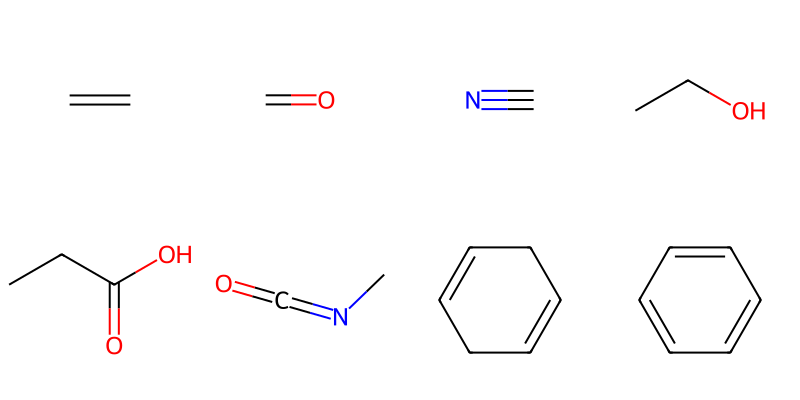

In [3]:
PandasTools.FrameToGridImage(df.head(8), molsPerRow=4)

/ext3/miniconda3/lib/python3.9/site-packages/rdkit/Chem/PandasTools.py:374: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame[molCol] = frame[smilesCol].map(Chem.MolFromSmiles)


,smiles,ROMol,n_Atoms
0,C=C,,2
1,C=O,,2

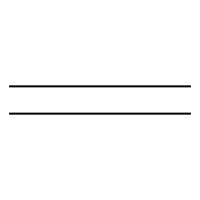
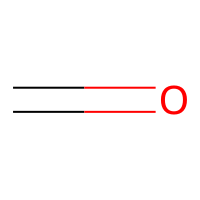

In [4]:
df["n_Atoms"] = df['ROMol'].map(lambda x: x.GetNumAtoms())
df_head = df.head(2)
PandasTools.AddMoleculeColumnToFrame(df_head, 'smiles', 'ROMol')
df_head

In [6]:
from psikit import Psikit

# Function to compute energy using PsiKit
def compute_energy(smiles):
    pkit = Psikit()
    pkit.read_from_smiles(smiles)
    pkit.optimize()
    return pkit.energy()

# Applying the energy calculation for each SMILES
# Note: These calculations can be time-consuming
df['energy'] = df['smiles'].apply(lambda x: float(compute_energy(x)))


Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!


In [7]:
df.to_csv('energy_table.csv', index=False)

,smiles,ROMol,n_Atoms,energy
0,C=C,,2,-78.038769
1,C=O,,2,-113.869536
2,C#N,,2,-92.876942
3,CCO,,3,-154.089919
4,CCC(=O)O,,5,-266.858985
5,CN=C=O,,4,-206.795542
6,C1=CCC=CC1,,6,-231.846762
7,C1=CC=CC=C1,,6,-230.713524
8,C1=C(C)C=CC=C1,,7,-269.753552
9,C1CCC2CCCCC2C1,,10,-389.204842

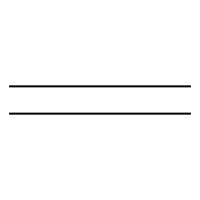
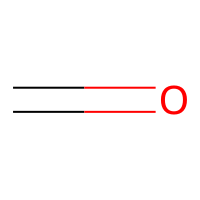
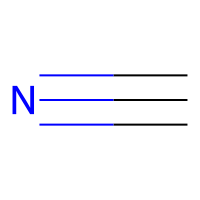
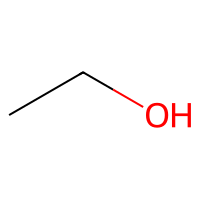
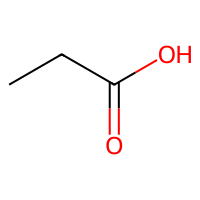
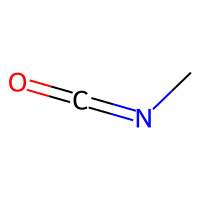
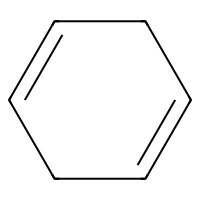
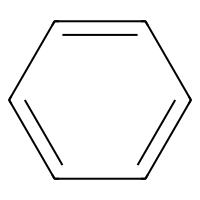
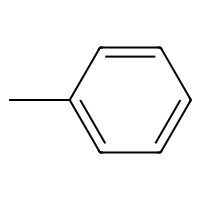
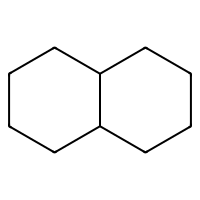

In [8]:
df